In [76]:
%matplotlib inline
from pycocotools.coco import COCO
import os
import glob
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [71]:
dataDir='.'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=12.33s)
creating index...
index created!


In [72]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports animal outdoor indoor kitchen accessory person vehicle food electronic furniture appliance


## Construct COCO dataset

In [105]:
coco_index = {1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name': 'frisbee'}, 35: {'id': 35, 'name': 'skis'}, 36: {'id': 36, 'name': 'snowboard'}, 37: {'id': 37, 'name': 'sports ball'}, 38: {'id': 38, 'name': 'kite'}, 39: {'id': 39, 'name': 'baseball bat'}, 40: {'id': 40, 'name': 'baseball glove'}, 41: {'id': 41, 'name': 'skateboard'}, 42: {'id': 42, 'name': 'surfboard'}, 43: {'id': 43, 'name': 'tennis racket'}, 44: {'id': 44, 'name': 'bottle'}, 46: {'id': 46, 'name': 'wine glass'}, 47: {'id': 47, 'name': 'cup'}, 48: {'id': 48, 'name': 'fork'}, 49: {'id': 49, 'name': 'knife'}, 50: {'id': 50, 'name': 'spoon'}, 51: {'id': 51, 'name': 'bowl'}, 52: {'id': 52, 'name': 'banana'}, 53: {'id': 53, 'name': 'apple'}, 54: {'id': 54, 'name': 'sandwich'}, 55: {'id': 55, 'name': 'orange'}, 56: {'id': 56, 'name': 'broccoli'}, 57: {'id': 57, 'name': 'carrot'}, 58: {'id': 58, 'name': 'hot dog'}, 59: {'id': 59, 'name': 'pizza'}, 60: {'id': 60, 'name': 'donut'}, 61: {'id': 61, 'name': 'cake'}, 62: {'id': 62, 'name': 'chair'}, 63: {'id': 63, 'name': 'couch'}, 64: {'id': 64, 'name': 'potted plant'}, 65: {'id': 65, 'name': 'bed'}, 67: {'id': 67, 'name': 'dining table'}, 70: {'id': 70, 'name': 'toilet'}, 72: {'id': 72, 'name': 'tv'}, 73: {'id': 73, 'name': 'laptop'}, 74: {'id': 74, 'name': 'mouse'}, 75: {'id': 75, 'name': 'remote'}, 76: {'id': 76, 'name': 'keyboard'}, 77: {'id': 77, 'name': 'cell phone'}, 78: {'id': 78, 'name': 'microwave'}, 79: {'id': 79, 'name': 'oven'}, 80: {'id': 80, 'name': 'toaster'}, 81: {'id': 81, 'name': 'sink'}, 82: {'id': 82, 'name': 'refrigerator'}, 84: {'id': 84, 'name': 'book'}, 85: {'id': 85, 'name': 'clock'}, 86: {'id': 86, 'name': 'vase'}, 87: {'id': 87, 'name': 'scissors'}, 88: {'id': 88, 'name': 'teddy bear'}, 89: {'id': 89, 'name': 'hair drier'}, 90: {'id': 90, 'name': 'toothbrush'}}

In [106]:
ExDark2COCO = {}
ExDark2COCO['Bicycle'] = 2
ExDark2COCO['Boat'] = 9
ExDark2COCO['Bottle'] = 44
ExDark2COCO['Bus'] = 6
ExDark2COCO['Car'] = 3
ExDark2COCO['Cat'] = 17
ExDark2COCO['Cup'] = 47
ExDark2COCO['Dog'] = 18
ExDark2COCO['Motorbike'] = 4
ExDark2COCO['People'] = 1
ExDark2COCO['Table'] = 67
ExDark2COCO['Chair'] = 62

ExDark_tag_hub = {}

for ins in ExDark2COCO:
    coco_name = coco_index[ExDark2COCO[ins]]['name']
    ExDark_tag_hub[ins] = {coco_name}

ExDark_tag_hub['Cup'].add('wine glass')
ExDark_tag_hub['Cup'].add('bottle')
ExDark_tag_hub['Cup'].add('bowl')
ExDark_tag_hub['Car'].add('bus')   
ExDark_tag_hub['Car'].add('truck')  
ExDark_tag_hub['Chair'].add('bench')
ExDark_tag_hub['Chair'].add('couch')

for ins in ExDark_tag_hub:
    print(ins, ":", ExDark_tag_hub[ins])

Bicycle : {'bicycle'}
Boat : {'boat'}
Bottle : {'bottle'}
Bus : {'bus'}
Car : {'truck', 'car', 'bus'}
Cat : {'cat'}
Cup : {'wine glass', 'bowl', 'cup', 'bottle'}
Dog : {'dog'}
Motorbike : {'motorcycle'}
People : {'person'}
Table : {'dining table'}
Chair : {'chair', 'bench', 'couch'}


In [109]:
def transfer_image(tag, num, new_dataset="COCO_6k", flag_exec=False):
    catIds = coco.getCatIds(catNms=[tag]);
    imgIds = coco.getImgIds(catIds=catIds);
    for idx_img in range(num):
        imgIds = coco.getImgIds(imgIds = imgIds)
        img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
        img_name = os.path.basename(img['coco_url'])
        command_mv = "cp ./images/"+img_name+" "+new_dataset
        if flag_exec:
            os.system(command_mv)
        else:
            print(command_mv)

In [110]:
# create a new folder
new_dataset = "COCO_6k"
command_mkdir = "mkdir "+new_dataset
os.system(command_mkdir)

img_per_cat = 500

for ins in ExDark_tag_hub:
    print(ins, ":", ExDark_tag_hub[ins])
    # if there is only one category, just select it.
    if len(ExDark_tag_hub[ins]) == 1:
        tag = list(ExDark_tag_hub[ins])[0]
        transfer_image(tag, img_per_cat, flag_exec=True)
        
    # if not, minors take 10% and major take the rest
    else:
        num_major = int((11-len(ExDark_tag_hub[ins]))/10*img_per_cat)
        num_minor = int(1/10*img_per_cat)
        tag_major = ins.lower()
        ExDark_tag_hub[ins].discard(tag_major)
        tags_minor = list(ExDark_tag_hub[ins])
        transfer_image(tag_major, num_major, flag_exec=True)
        for tag in tags_minor:
            transfer_image(tag, num_minor, flag_exec=True)

Bicycle : {'bicycle'}
Boat : {'boat'}
Bottle : {'bottle'}
Bus : {'bus'}
Car : {'truck', 'car', 'bus'}
Cat : {'cat'}
Cup : {'wine glass', 'bowl', 'cup', 'bottle'}
Dog : {'dog'}
Motorbike : {'motorcycle'}
People : {'person'}
Table : {'dining table'}
Chair : {'chair', 'bench', 'couch'}


In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['dog']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds);
print(imgIds)
imgIds = coco.getImgIds(imgIds = imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

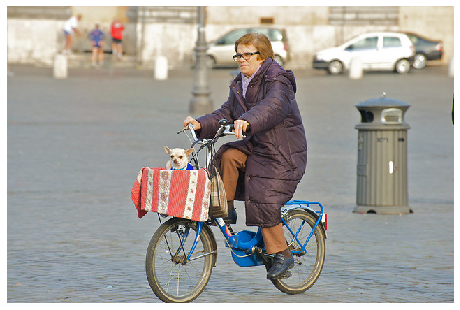

In [74]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [75]:
import os
import glob

print(img['coco_url'])
print(os.path.basename(img['coco_url']))
print(glob.glob("images/000000491525.jpg"))

http://images.cocodataset.org/train2017/000000481454.jpg
000000481454.jpg
['images/000000491525.jpg']


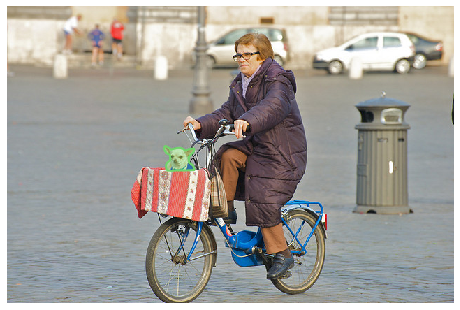

In [77]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)